<a href="https://colab.research.google.com/github/jktb/DEEP--Tech-123/blob/main/DTTE_Colab_tutorial_13_Introduction_to_Gradient_Descent_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Perceptron and Gradient Descent
## Introduction to Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$



In [ ]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)

We can start be choosing coefficients for a second degree polynomial equation $(a x^2 + bx + c)$ that will distribute the data we will try to model.

Let's define some random x data (inputs) we hope to predict y (outputs) of.

In [ ]:
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

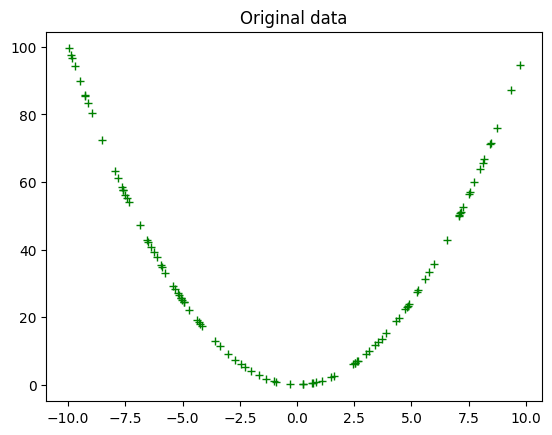

In [ ]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

This is good, but we could improve on this by making things more realistic. You can add noise or **jitter** to the values so they can resemble real-world data.


In [ ]:
def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)


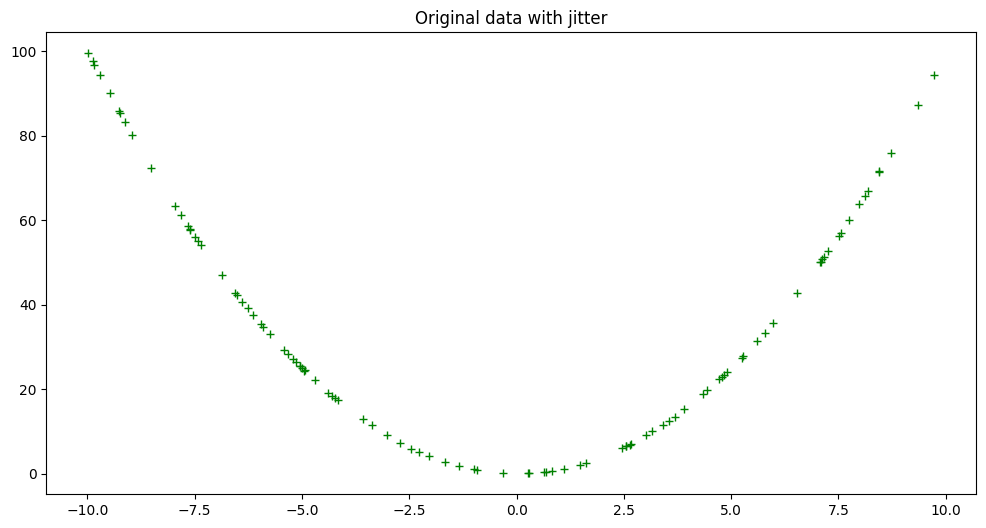

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

We will now build our predictive model, and optimize it with gradient descent and we will try to get as close to these values as possible.

To get a quantifiable measure of how incorrect it is, we calculate the Mean Squared Error loss for the model. This is the mean value of the sum of the squared differences between the actual and predicted outputs.

$$ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar{y_i})^2 $$

In [ ]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

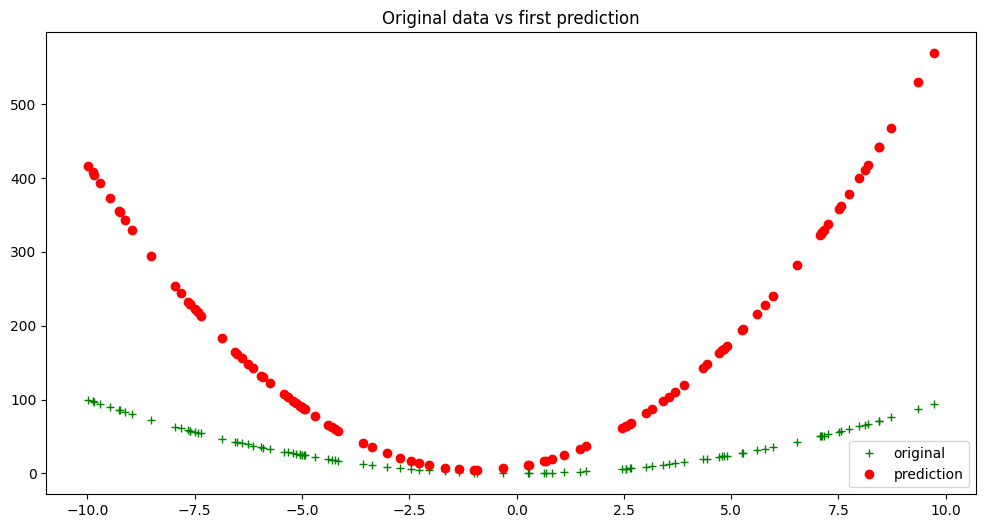

In [ ]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [ ]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

34733.58007466879

We can see that the loss is quite a large number. Let’s now see if we can improve on this fairly high loss metric by optimizing the model with gradient descent.

We wish to improve our model. Therefore we want to alter its coefficients $a$, $b$ and $c$ to decrease the error. Therefore we require knowledge about how each coefficient affects the error. This is achieved by calculating the partial derivative of the loss function with respect to **each** of the individual coefficients.

In [ ]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """

    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts

In [ ]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (3.3715181128645755, 8.980943031607687, 8.971000639140287)
Now have smaller model loss: 13714.022662757046 vs 34733.58007466879


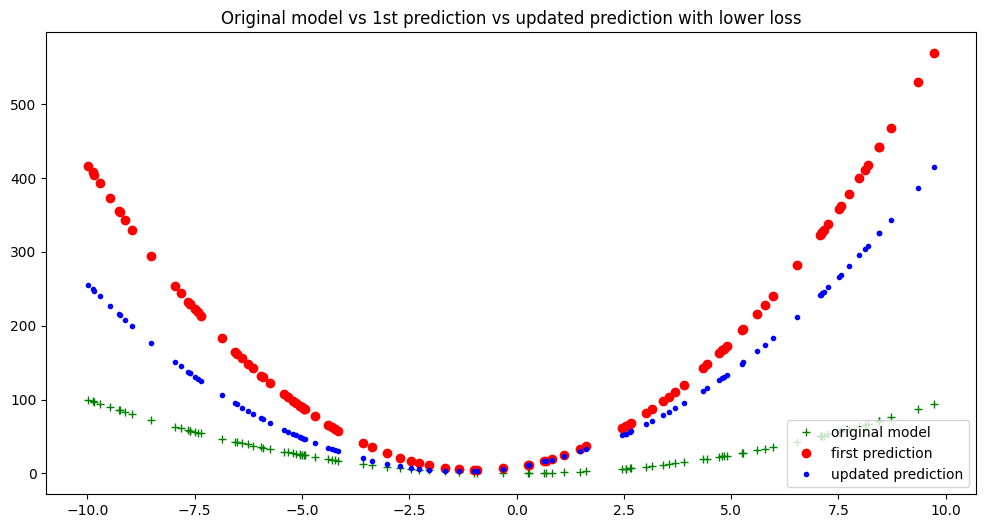

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

We’re almost ready. The last step will be to perform gradient descent iteratively over a number of epochs (cycles or iterations.) With every epoch we hope to see an improvement in the form of lowered loss, and better model-fitting to the original data.

In [ ]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [ ]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

[4747.006629626787, 2793.1104689705144, 2572.242119728995, 2462.324582703036, 2363.1586150932794, 2268.4061919378887, 2177.5241721855436, 2090.3329688971735, 2006.681347052125, 1926.4255107389927, 1849.4275824124336, 1775.5552874432055, 1704.6817219987488, 1636.6851346972287, 1571.4487173948626, 1508.860404484054, 1448.812680341259, 1391.202394592733, 1335.9305848807019, 1282.902306825404, 1232.0264708908617, 1183.2156858740864, 1136.3861087487758, 1091.4573006055275, 1048.3520884410327, 1006.9964325587756, 967.3192993534134, 929.2525392602345, 892.7307696600161, 857.6912625380552, 824.0738367043753, 791.8207543899028, 760.8766220409502, 731.1882951415522, 702.704786900114, 675.3771806434845, 649.1585457679197, 624.0038571025289, 599.8699175466546, 576.7152838482515, 554.5001953957507, 533.1865059010456, 512.7376178562241, 493.1184196514255, 474.29522524578454, 456.23571628779627, 438.9088865856567, 422.2849888321696, 406.33548349267664, 391.0329897681941, 376.3512385494991, 362.265027

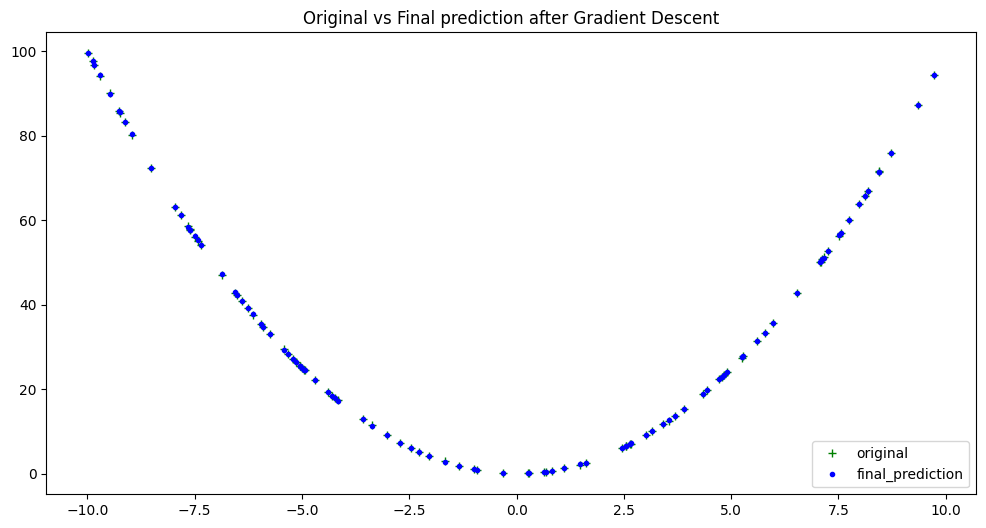

In [ ]:
GD = gradient_descent(30000, 0.0003)

plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

This trained model is showing vast improvements after it’s full training cycle. We can examine further by inspecting its final predicted coefficients $a$, $b$ and $c$.

In [ ]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (0.9995990804477548, -0.0006659284839104839, 0.013464146998914843)
Original Coefficients: [1, 0, 0]


Not too far off! A big improvement over the initial random model. Looking at the plot of the loss reduction over training offers further insights.


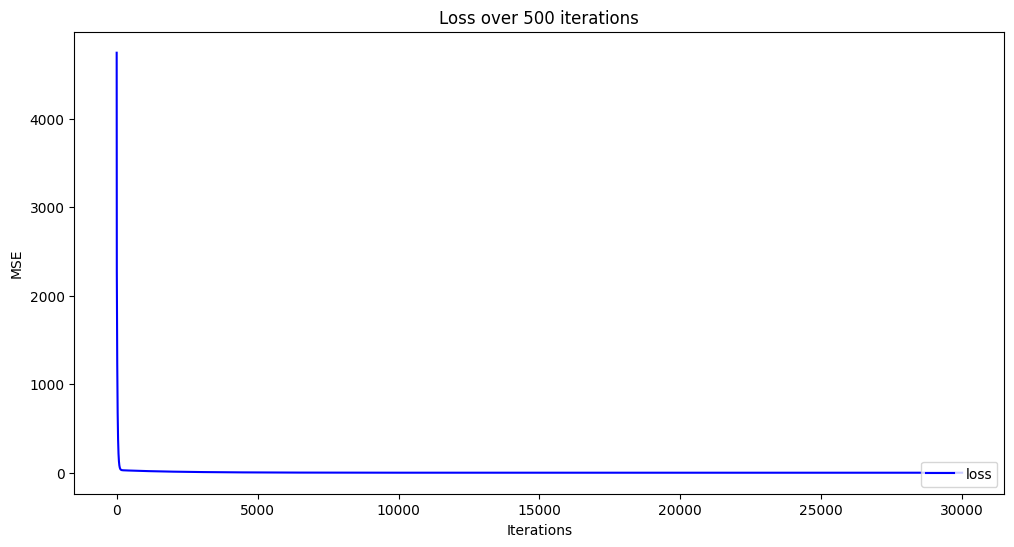

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

We observe that the model loss reached close to zero, to give us our more accurate coefficients. We can also see there was no major improvement in loss after about 100 epochs. An alternative strategy would be to add some kind of condition to the training step that stops training when a certain minimum loss threshold has been reached. This would prevent excessive training and potential over-fitting for the model.

# Things to try



1.   Change the coefficients array and try a different polynomial instead of our $x^2$.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of $x^2$?
4. Can you modify the algorithm to find a maxima of a function, instead of a minima?



**Answer -1**

In [ ]:
def eval_3rd_degree(coeffs, x):
    """
    Function to return the output of evaluating a third degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, c, and d for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the third degree polynomial.

    """

    a = coeffs[0] * (x * x*x)
    b = coeffs[1] * (x*x)
    c = coeffs[2] *  x
    d = coeffs[3]
    y = a + b + c + d
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 1, 1,1]
xs = []
ys = []
for x in hundred_xs:
    y  = eval_3rd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

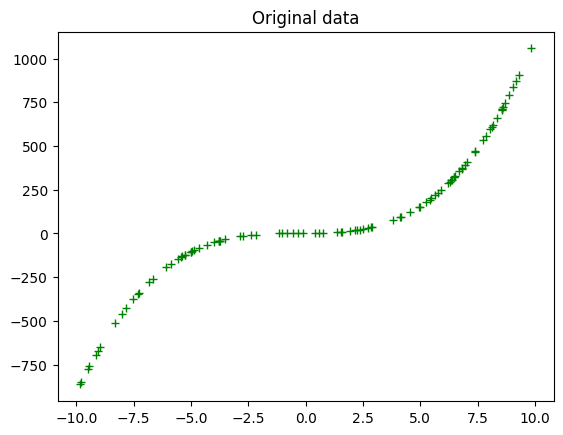

In [ ]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

In [ ]:
def eval_3rd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a third degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, c and d for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the third degree polynomial.

    """

    a = coeffs[0] * (x * x * x)
    b = coeffs[1] * (x * x)
    c = coeffs[2] * x
    d = coeffs[3]
    y = a + b + c + d

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_3rd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)

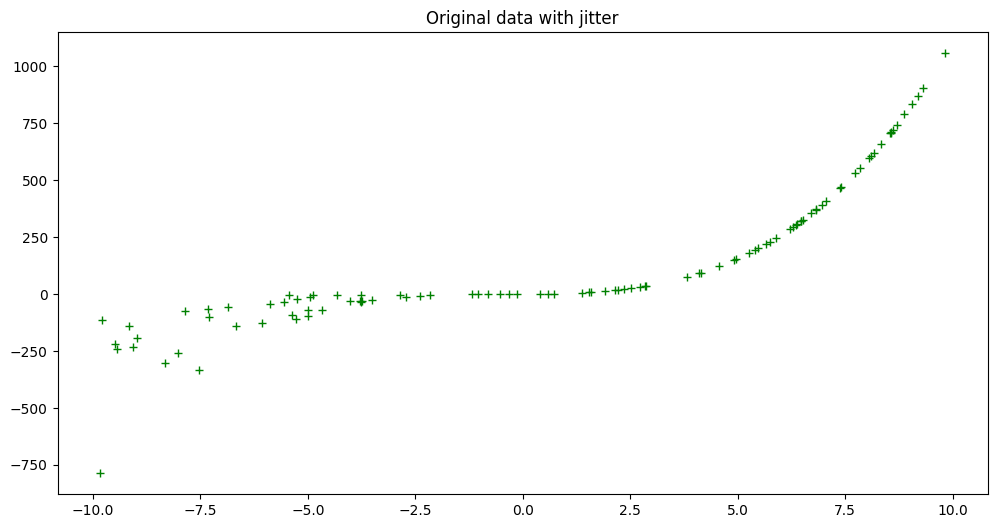

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

In [ ]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

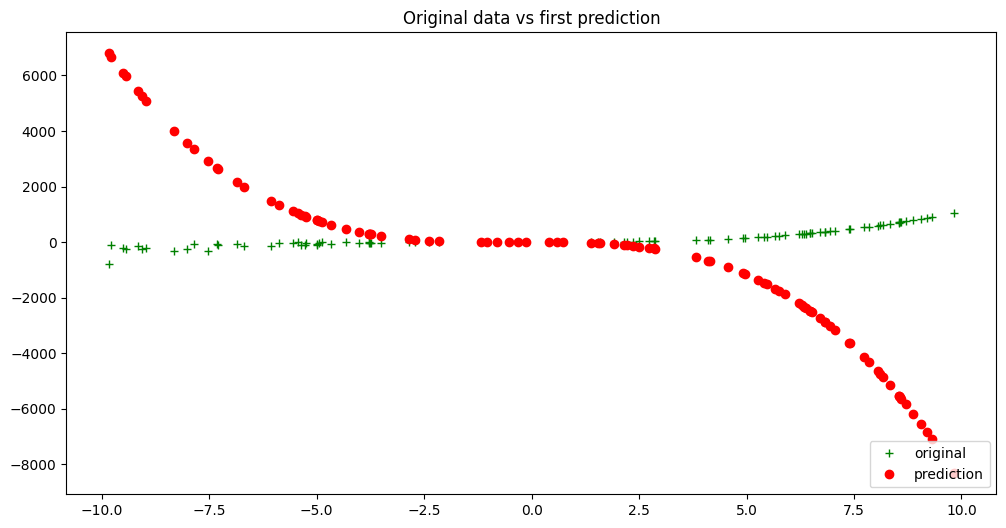

In [ ]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_3rd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [ ]:
def calc_gradient_3rd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a third degree polynomial.

    Args:
        coeffs: a,b, c, and d, for a 3rd degree polynomial [ y = ax^3 + bx^2 + cx+ d ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 3rd degree polynomial, as a tuple of its parts for a,b,c,d respectively.

    """

    a_s = []
    b_s = []
    c_s = []
    d_s = []

    y_bars = eval_3rd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_cube = x ** 3
        partial_a = x_cube* (y - y_bar)
        a_s.append(partial_a)
        partial_b = x **2*(y - y_bar)
        b_s.append(partial_b)
        partial_c = x*(y - y_bar)
        c_s.append(partial_c)
        partial_d =(y-y_bar)
        d_s.append(partial_d)
    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)

    return (gradient_a, gradient_b, gradient_c, gradient_d)   # return calculated gradients as a a tuple of its 3 parts


In [ ]:
calc_grad = calc_gradient_3rd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.00001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]
d_new = rand_coeffs[3] - lr * calc_grad[3]

new_model_coeffs = (a_new, b_new, c_new, d_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_3rd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (18.775223467528054, -7.083022227197243, 5.3896873078074865, 7.016283800576201)
Now have smaller model loss: 48958103.34067866 vs 34733.58007466879


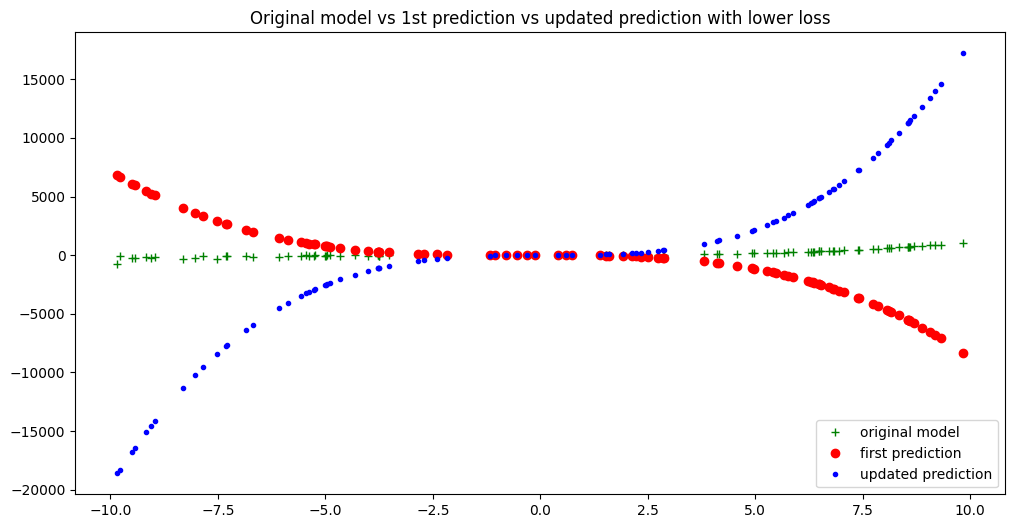

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

In [ ]:
def calc_gradient_3rd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a 3rd degree polynomial.

    Args:
        coeffs: a,b and c, for a 3rd degree polynomial [ y = ax^3 + bx^2 + cx+d ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 3rd degree polynomial, as a tuple of its parts for a,b,c,d respectively.

    """
    a_s = []
    b_s = []
    c_s = []
    d_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)
        partial_d = (y - y_bar)
        d_s.append(partial_d)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)



    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    d_new = coeffs[2] - lr * gradient_d


    new_model_coeffs = (a_new, b_new, c_new, d_new)

    # update with these new coeffs:
    new_y_bar = eval_3rd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [ ]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a 3rd degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_3rd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

[10730322.843398787, 9483822.778143795, 8365520.720919866, 7363485.976633497, 6466851.768910835, 5665722.242230981, 4951087.513927031, 4314746.082664782, 3749233.9595874464, 3247759.942780654, 2804146.5055034845, 2412775.814149511, 2068540.4335129736, 1766798.3149747336, 1503331.6979966464, 1274309.5871015717, 1076253.4955756867, 906006.1736939308, 760703.0635525229, 637746.2447901675, 534780.6557707826, 449672.39334877883, 380488.91129284224, 325480.95294233825, 283066.06783700763, 251813.5750097767, 230430.84746872462, 217750.803213114, 212720.4980171408, 214390.72425361362, 221906.52829104784, 234498.56654843703, 251475.2271932103, 272215.4507753894, 296162.18885570084, 322816.444953999, 351731.8469594031, 382509.70454404433, 414794.5091438254, 448269.8377447072, 482654.6250715127, 517699.77184526325, 553185.0595795617, 588916.3449491892, 624723.0091057343, 660455.6394546824, 695983.9233633686, 731194.7350553891, 765990.3985790088, 800287.1112280893, 834013.5131561446, 867109.390168

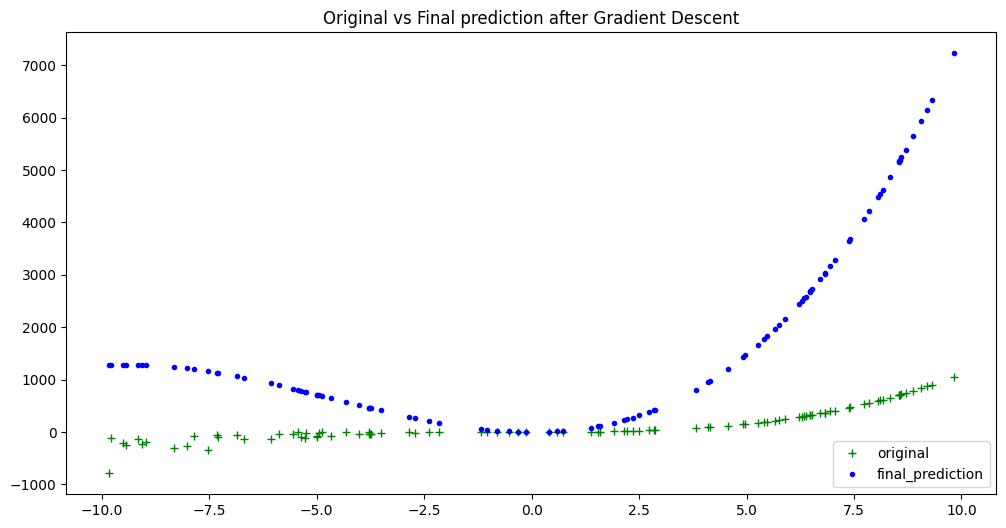

In [ ]:
GD = gradient_descent(50000, 0.00001)

plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

In [ ]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (3.160310189023772, 44.00561875601022, -2.541368246636938, -2.541368246636938)
Original Coefficients: [1, 1, 1, 1]


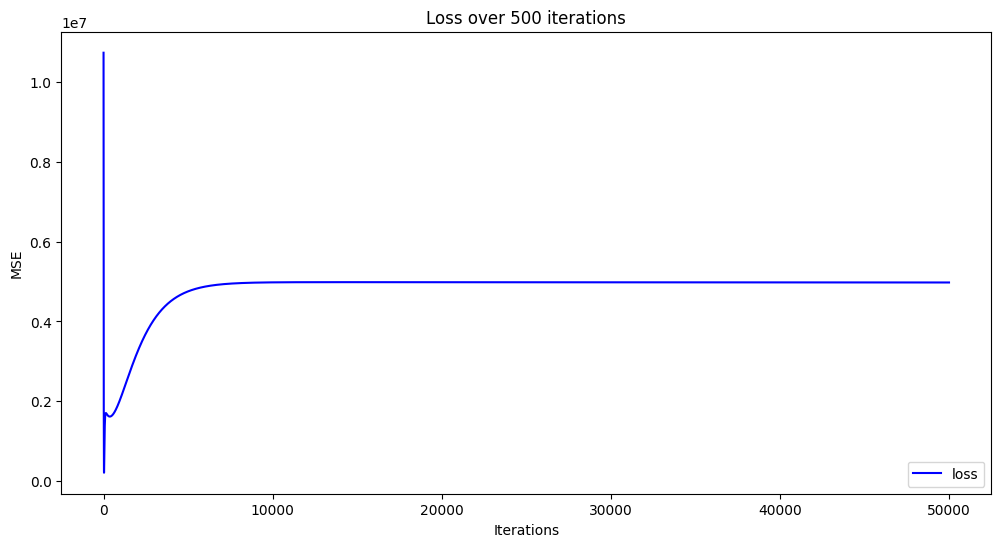

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

At the beginning of the gradient descent process, the randomly initialized coefficients for the third-degree polynomial might result in a high MSE. This is because the initial coefficients are unlikely to provide a good fit to the data.: As the optimization algorithm progresses through iterations, it adjusts the coefficients step by step to minimize the MSE. With each iteration, the polynomial's fit to the data improves, leading to a gradual reduction in the MSE. The descent might not be perfectly smooth, especially if the optimization process gets close to a local minimum.

**Answer-2**

1. With small learning rate, the updates to the coefficients will be small and gradual. While this might lead to slow convergence, it often helps avoid overshooting the minimum of the loss function. MSE decreasing consistently, but it might take a larger number of iterations to converge to a low value.

2. If the learning rate is too large, the optimization process might overshoot the minimum of the loss function and fail to converge. MSE might oscillate or even increase as the algorithm steps back and forth across the minimum. This is often referred to as "diverging" and can result in numerical instability.

**Answer-3**

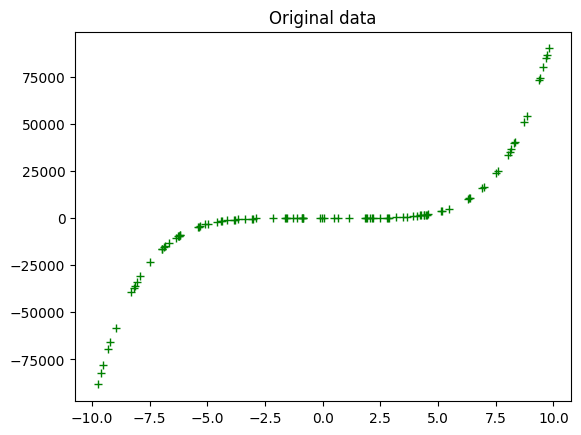

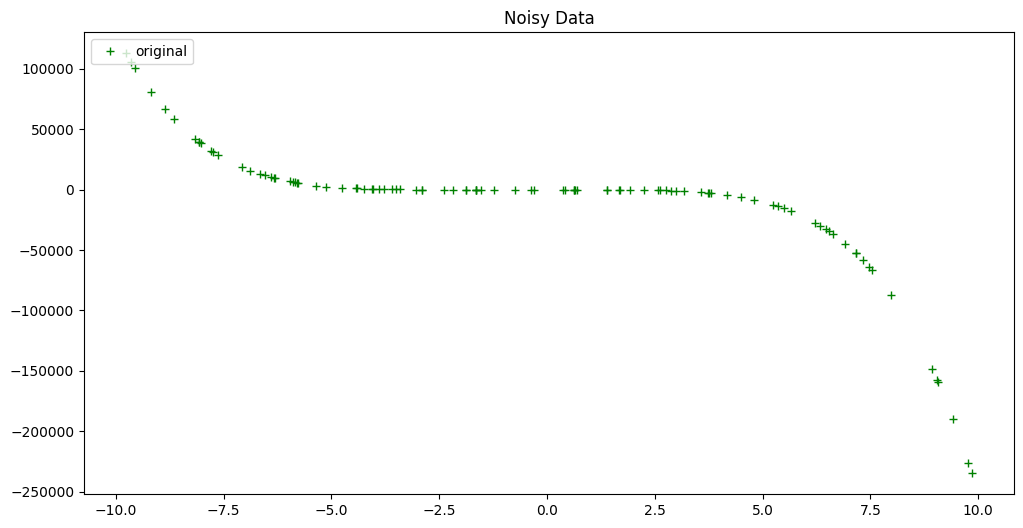

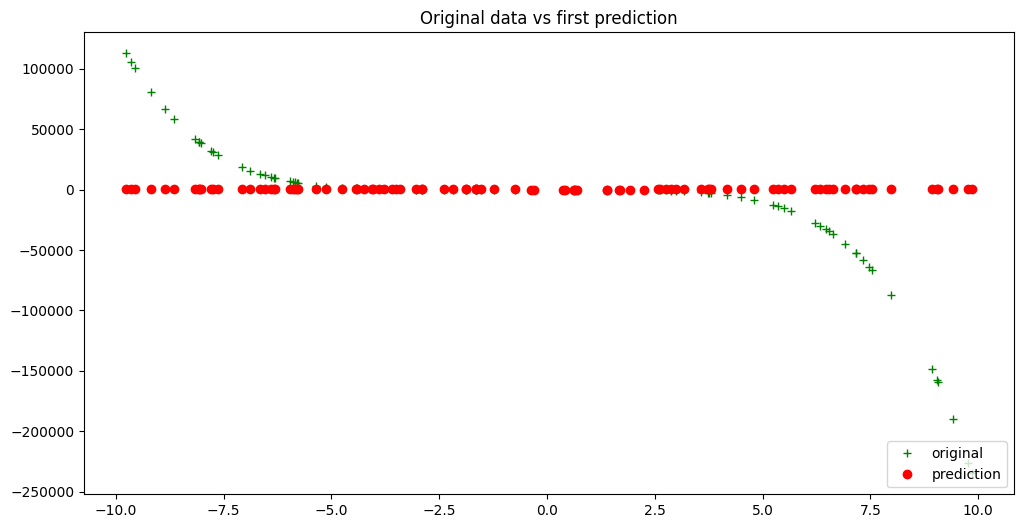

New model coeffs: (-3064142.570413673, 30086.81518952281, -37862.51272005245, 480.63428227666543, -497.70962282722445, 10.702577674335249)
Now have smaller model loss: 7.163124798462973e+21 vs 3069663184.050417


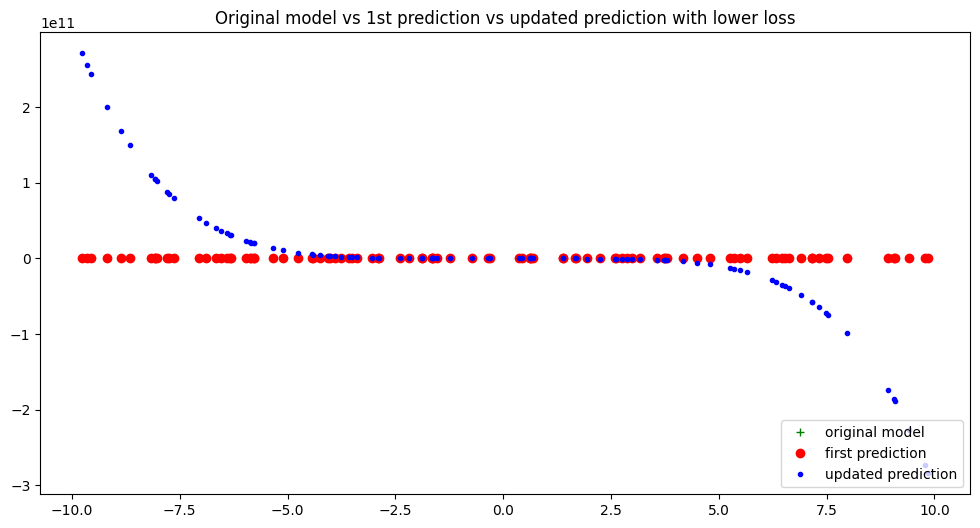

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



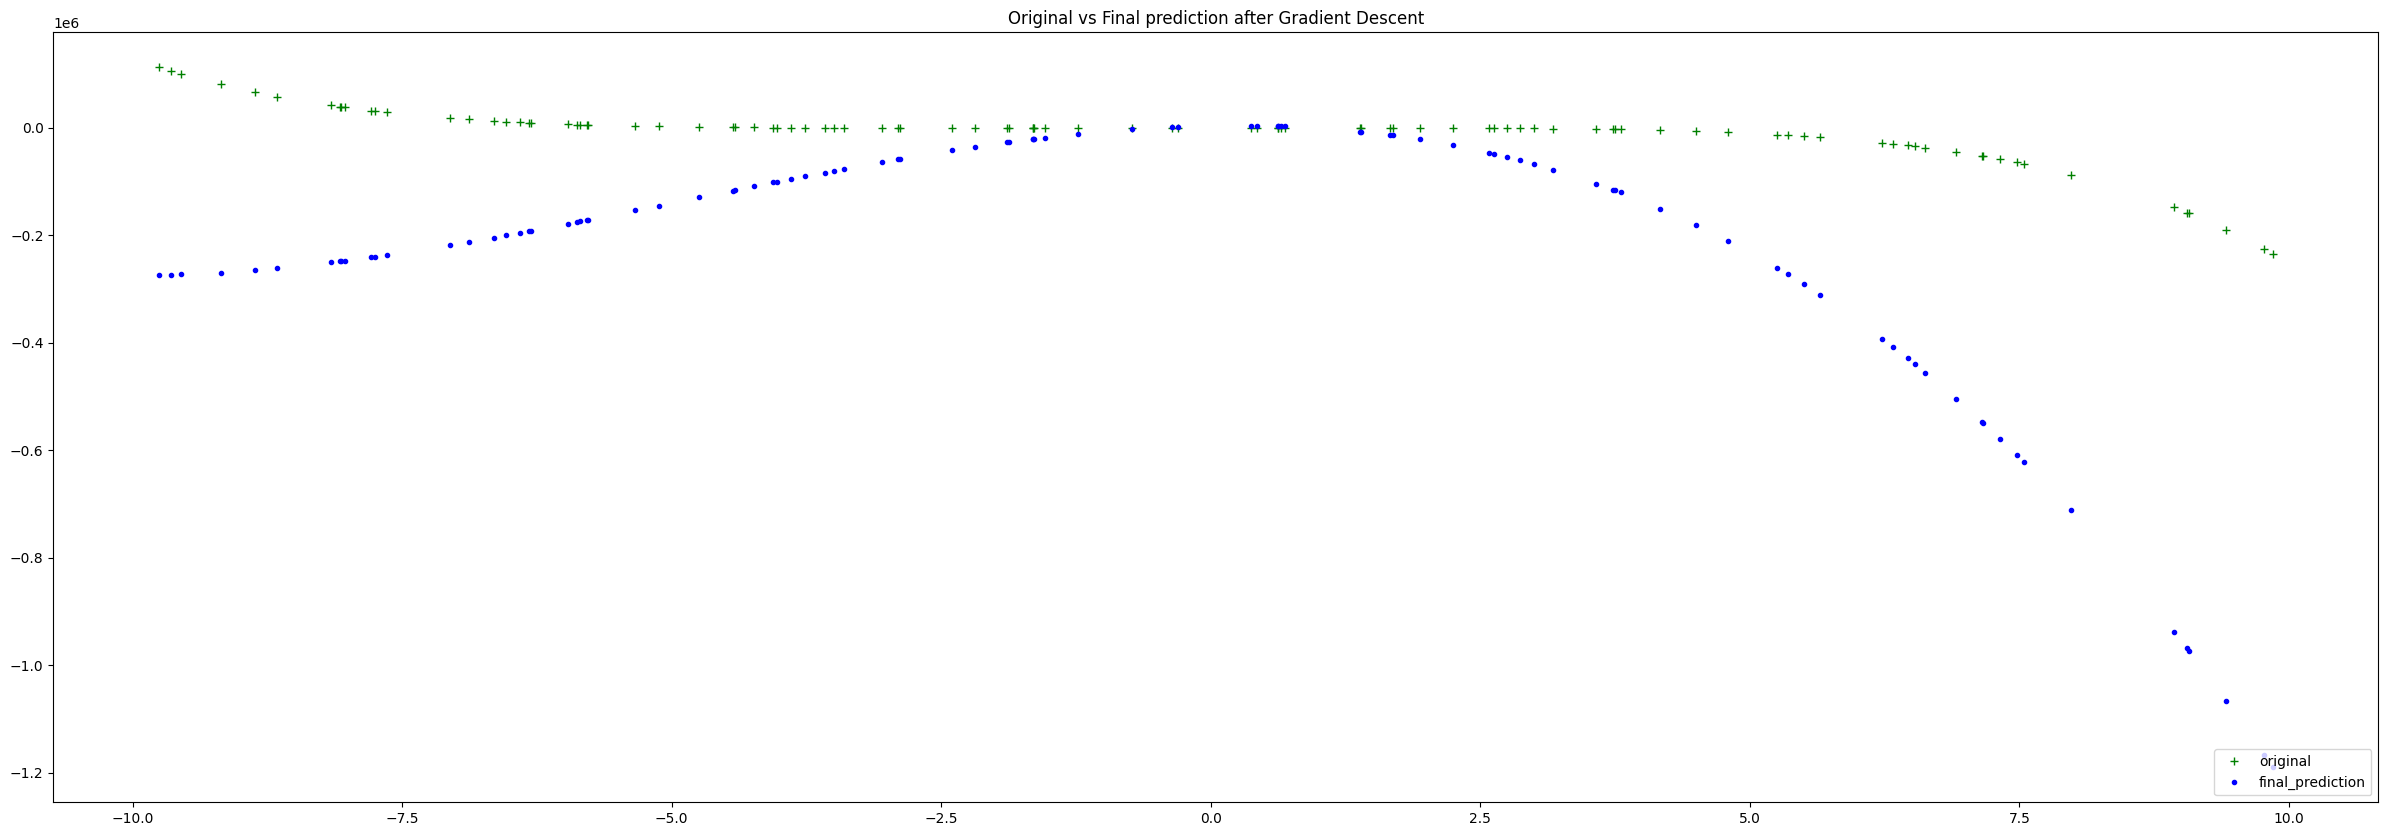

Final Coefficients predicted: (-517.4866000072129, -7586.676225661592, 3717.9199195249766, 3717.9199195249766)
Original Coefficients: [1, 0, 0, 0, 0, 0]


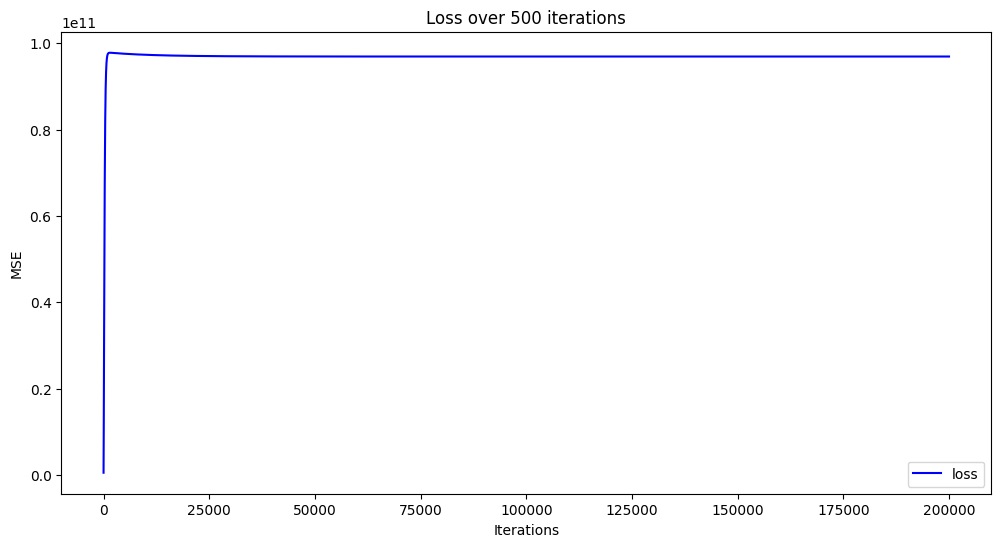

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

def eval_5th_degree(coeffs, x):
    """
    Function to return the output of evaluating a fifth degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, c, d, e, and f for the polynomial.
        x: The input x value to the polynomial.

    Returnimport numpy s:
        y: The corresponding output y value for the fifth degree polynomial.
    """
    a = coeffs[0] * (x ** 5)
    b = coeffs[1] * (x ** 4)
    c = coeffs[2] * (x ** 3)
    d = coeffs[3] * (x ** 2)
    e = coeffs[4] * x
    f = coeffs[5]
    y = a + b + c + d + e + f
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0,0,0,0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_5th_degree(coeffs, x)
    xs.append(x)
    ys.append(y)
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

def eval_5th_degree_jitter(coeffs, x, j):
    """
    Function to return the  output of evaluating a fifth degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, c, d, e, and f for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the fifth degree polynomial.
    """
    a = coeffs[0] * (x ** 5)
    b = coeffs[1] * (x ** 4)
    c = coeffs[2] * (x ** 3)
    d = coeffs[3] * (x ** 2)
    e = coeffs[4] * x
    f = coeffs[5]
    y = a + b + c + d + e + f

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.uniform(interval_min, interval_max)

    return jit_val

# Generate random x values
hundred_xs = np.random.uniform(-10, 10, 100)

# Random coefficients for a degree 5 polynomial
rand_coeffs = [random.uniform(-10, 10) for _ in range(6)]

# Initialize the lists to store data points
xs = []
ys = []

# Generate noisy data points
for x in hundred_xs:
    y = eval_5th_degree_jitter(rand_coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label='original')
plt.title('Noisy Data')
plt.legend(loc="upper left")
plt.show()

# calculate the Mean Squared Error loss for the model

def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10),random.randrange(-10, 10),random.randrange(-10, 10),random.randrange(-10, 10),random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

def calc_gradient_5th_poly(rand_coeffs, hundred_xs, ys):
    """
    Calculates the gradient for a fifth-degree polynomial.

    Args:
        rand_coeffs: Coefficients a, b, c, d, e, and f for a 5th degree polynomial.
        hundred_xs: x input datapoints.
        ys: Actual y output points.

    Returns: Calculated gradients for the 5th degree polynomial, as a tuple of its parts for a, b, c, d, e, and f respectively.
    """
    a_s = []
    b_s = []
    c_s = []
    d_s = []
    e_s = []
    f_s = []

    y_bars = eval_5th_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in zip(hundred_xs, ys, y_bars):
        x_5th = x ** 5
        x_4th = x ** 4
        x_3rd = x ** 3
        x_2nd = x ** 2
        x_1st = x
        partial_a = x_5th * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x_4th * (y - y_bar)
        b_s.append(partial_b)
        partial_c = x_3rd * (y - y_bar)
        c_s.append(partial_c)
        partial_d = x_2nd * (y - y_bar)
        d_s.append(partial_d)
        partial_e = x_1st * (y - y_bar)
        e_s.append(partial_e)
        partial_f = (y - y_bar)
        f_s.append(partial_f)

    n = len(y_bars)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)
    gradient_e = (-2 / n) * sum(e_s)
    gradient_f = (-2 / n) * sum(f_s)

    return gradient_a, gradient_b, gradient_c, gradient_d, gradient_e, gradient_f
# Calculate the gradient for a fifth-degree polynomial
calc_grad = calc_gradient_5th_poly(rand_coeffs, hundred_xs, ys)

# Set the learning rate
lr = 0.00025

# Update each coefficient using gradient descent
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]
d_new = rand_coeffs[3] - lr * calc_grad[3]
e_new = rand_coeffs[4] - lr * calc_grad[4]
f_new = rand_coeffs[5] - lr * calc_grad[5]

# Create the new set of model coefficients
new_model_coeffs = (a_new, b_new, c_new, d_new, e_new, f_new)
print(f"New model coeffs: {new_model_coeffs}")

# Update the predictions using the new coefficients
new_y_bar = eval_5th_degree(new_model_coeffs, hundred_xs)

# Calculate the updated model loss
updated_model_loss = loss_mse(ys, new_y_bar)

# Print the updated model loss
print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

def calc_gradient_5th_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    Calculates the gradient for a fifth degree polynomial.

    Args:
        coeffs: Coefficients a, b, c, d, e, and f for a 5th degree polynomial.
        inputs_x: x input datapoints.
        outputs_y: actual y output points.
        lr: learning rate.

    Returns: Tuple containing updated model loss, new model coefficients, and new y-bar predictions.
    """
    a_s = []
    b_s = []
    c_s = []
    d_s = []
    e_s = []
    f_s = []

    y_bars = eval_5th_degree(coeffs, inputs_x)

    for x, y, y_bar in zip(inputs_x, outputs_y, y_bars):
        x_5th = x ** 5
        x_4th = x ** 4
        x_3rd = x ** 3
        x_2nd = x ** 2
        x_1st = x
        partial_a = x_5th * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x_4th * (y - y_bar)
        b_s.append(partial_b)
        partial_c = x_3rd * (y - y_bar)
        c_s.append(partial_c)
        partial_d = x_2nd * (y - y_bar)
        d_s.append(partial_d)
        partial_e = x_1st * (y - y_bar)
        e_s.append(partial_e)
        partial_f = (y - y_bar)
        f_s.append(partial_f)

    n = len(y_bars)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)
    gradient_e = (-2 / n) * sum(e_s)
    gradient_f = (-2 / n) * sum(f_s)

    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    d_new = coeffs[3] - lr * gradient_d
    e_new = coeffs[4] - lr * gradient_e
    f_new = coeffs[5] - lr * gradient_f

    new_model_coeffs = (a_new, b_new, c_new, d_new, e_new, f_new)

    new_y_bar = eval_5th_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar
def gradient_descent_5th_degree(epochs, lr):
    """
    Perform gradient descent for a fifth-degree polynomial.

    Args:
        epochs: number of iterations to perform for finding new coefficients and updating loss.
        lr: specified learning rate.

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates).
    """
    losses = []
    rand_coeffs_to_test = rand_coeffs  # You need to initialize rand_coeffs
    initial_model_loss, _, _ = calc_gradient_5th_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)

    for i in range(epochs):
        loss, new_coeffs, new_y_bar = calc_gradient_5th_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = new_coeffs
        losses.append(loss)

    print(losses)
    return loss, new_coeffs, new_y_bar, losses
GD = gradient_descent(200000, 0.0001)

plt.figure(figsize=(30,10))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()


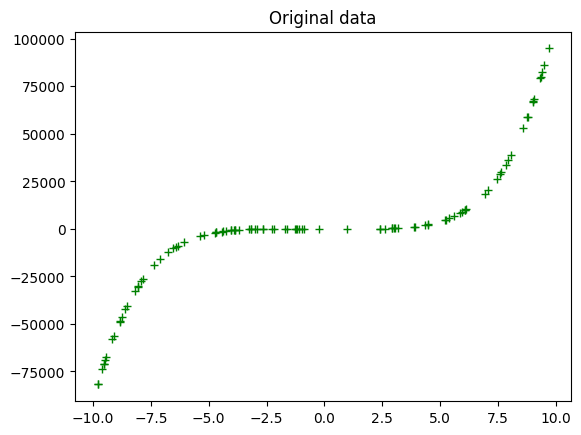

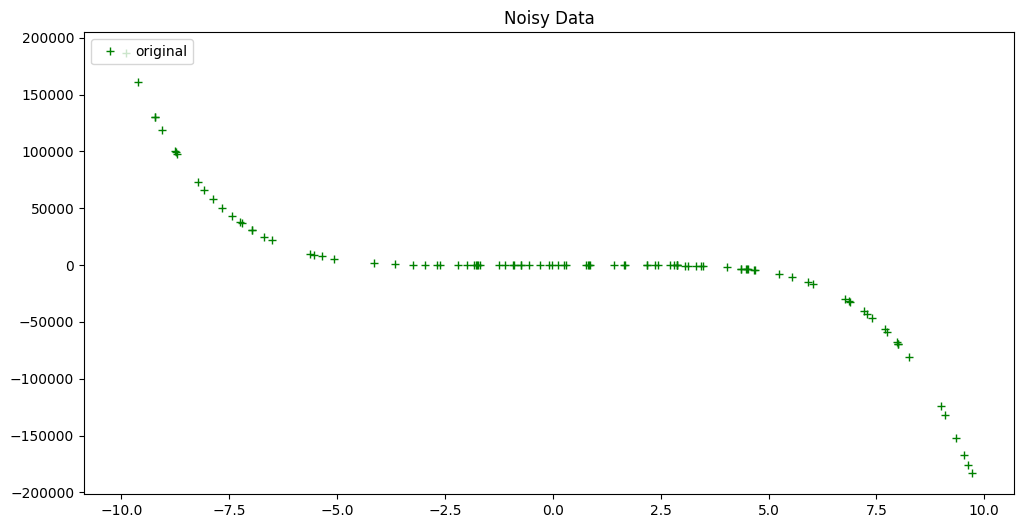

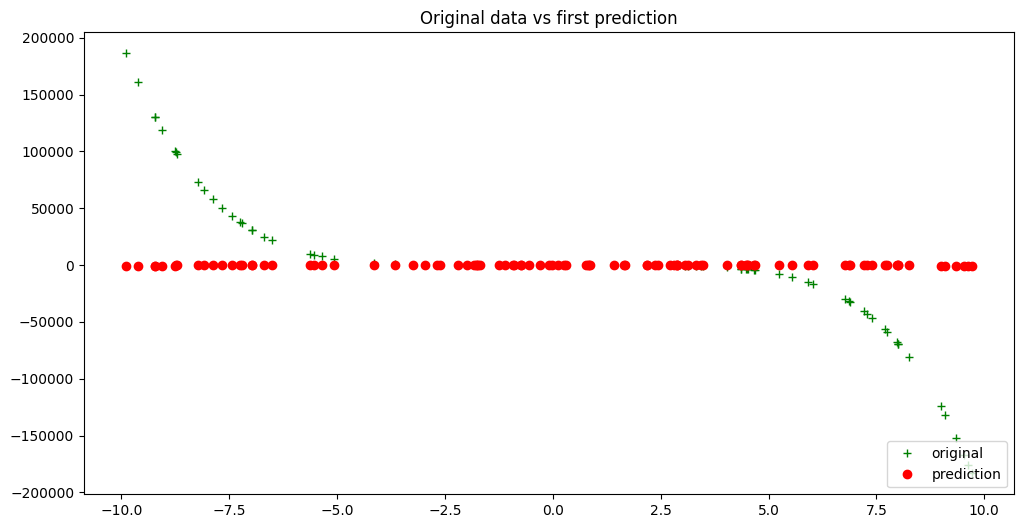

New model coeffs: (1675588.911740083, 5675.926289819898, 20764.4528482833, 82.47784876114251, 261.25124634783094, 0.22726173460633836)
Now have smaller model loss: 2.3549532951320697e+21 vs 3466931649.3321223


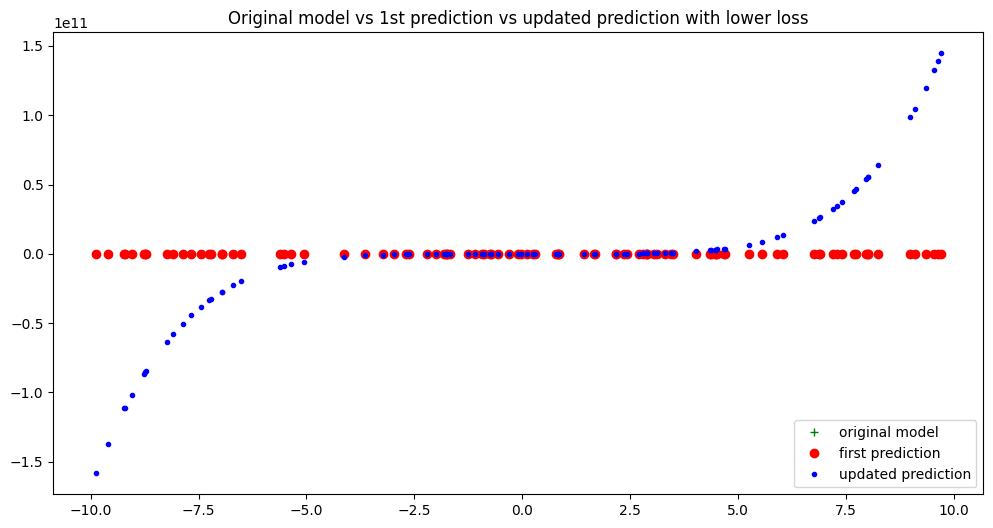

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



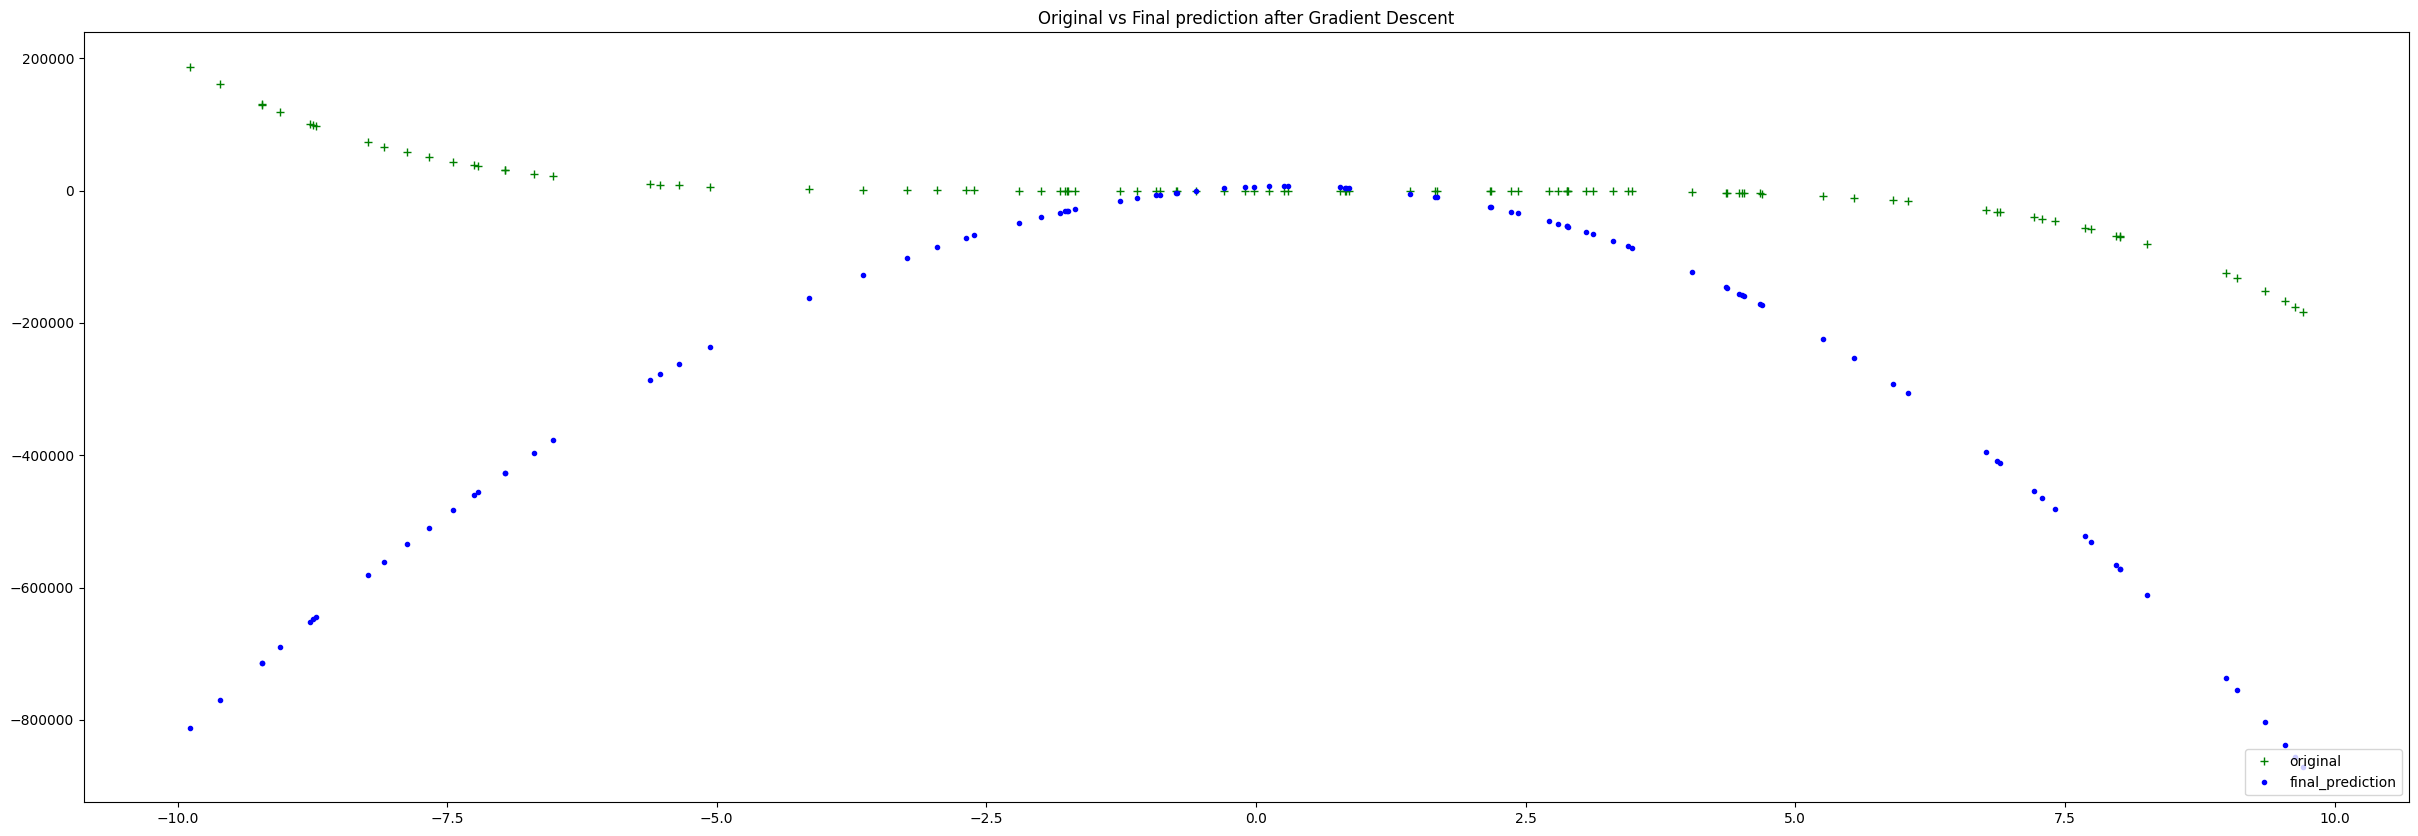

Final Coefficients predicted: (-107.3329740561836, -8846.717171609716, 5672.2530463228895, 5672.2530463228895)
Original Coefficients: [1, 1, 1, 1, 0, 0]


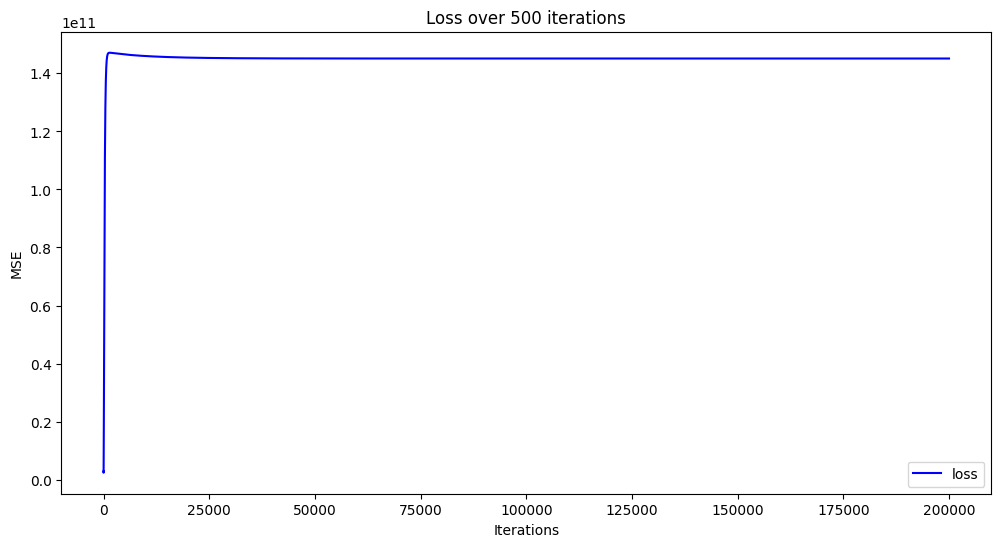

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

def eval_5th_degree(coeffs, x):
    """
    Function to return the output of evaluating a fifth degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, c, d, e, and f for the polynomial.
        x: The input x value to the polynomial.

    Returnimport numpy s:
        y: The corresponding output y value for the fifth degree polynomial.
    """
    a = coeffs[0] * (x ** 5)
    b = coeffs[1] * (x ** 4)
    c = coeffs[2] * (x ** 3)
    d = coeffs[3] * (x ** 2)
    e = coeffs[4] * x
    f = coeffs[5]
    y = a + b + c + d + e + f
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 1, 1,1,0,0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_5th_degree(coeffs, x)
    xs.append(x)
    ys.append(y)
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

def eval_5th_degree_jitter(coeffs, x, j):
    """
    Function to return the  output of evaluating a fifth degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, c, d, e, and f for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the fifth degree polynomial.
    """
    a = coeffs[0] * (x ** 5)
    b = coeffs[1] * (x ** 4)
    c = coeffs[2] * (x ** 3)
    d = coeffs[3] * (x ** 2)
    e = coeffs[4] * x
    f = coeffs[5]
    y = a + b + c + d + e + f

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.uniform(interval_min, interval_max)

    return jit_val

# Generate random x values
hundred_xs = np.random.uniform(-10, 10, 100)

# Random coefficients for a degree 5 polynomial
rand_coeffs = [random.uniform(-10, 10) for _ in range(6)]

# Initialize the lists to store data points
xs = []
ys = []

# Generate noisy data points
for x in hundred_xs:
    y = eval_5th_degree_jitter(rand_coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label='original')
plt.title('Noisy Data')
plt.legend(loc="upper left")
plt.show()

# calculate the Mean Squared Error loss for the model

def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10),random.randrange(-10, 10),random.randrange(-10, 10),random.randrange(-10, 10),random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

def calc_gradient_5th_poly(rand_coeffs, hundred_xs, ys):
    """
    Calculates the gradient for a fifth-degree polynomial.

    Args:
        rand_coeffs: Coefficients a, b, c, d, e, and f for a 5th degree polynomial.
        hundred_xs: x input datapoints.
        ys: Actual y output points.

    Returns: Calculated gradients for the 5th degree polynomial, as a tuple of its parts for a, b, c, d, e, and f respectively.
    """
    a_s = []
    b_s = []
    c_s = []
    d_s = []
    e_s = []
    f_s = []

    y_bars = eval_5th_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in zip(hundred_xs, ys, y_bars):
        x_5th = x ** 5
        x_4th = x ** 4
        x_3rd = x ** 3
        x_2nd = x ** 2
        x_1st = x
        partial_a = x_5th * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x_4th * (y - y_bar)
        b_s.append(partial_b)
        partial_c = x_3rd * (y - y_bar)
        c_s.append(partial_c)
        partial_d = x_2nd * (y - y_bar)
        d_s.append(partial_d)
        partial_e = x_1st * (y - y_bar)
        e_s.append(partial_e)
        partial_f = (y - y_bar)
        f_s.append(partial_f)

    n = len(y_bars)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)
    gradient_e = (-2 / n) * sum(e_s)
    gradient_f = (-2 / n) * sum(f_s)

    return gradient_a, gradient_b, gradient_c, gradient_d, gradient_e, gradient_f
# Calculate the gradient for a fifth-degree polynomial
calc_grad = calc_gradient_5th_poly(rand_coeffs, hundred_xs, ys)

# Set the learning rate
lr = 0.00035

# Update each coefficient using gradient descent
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]
d_new = rand_coeffs[3] - lr * calc_grad[3]
e_new = rand_coeffs[4] - lr * calc_grad[4]
f_new = rand_coeffs[5] - lr * calc_grad[5]

# Create the new set of model coefficients
new_model_coeffs = (a_new, b_new, c_new, d_new, e_new, f_new)
print(f"New model coeffs: {new_model_coeffs}")

# Update the predictions using the new coefficients
new_y_bar = eval_5th_degree(new_model_coeffs, hundred_xs)

# Calculate the updated model loss
updated_model_loss = loss_mse(ys, new_y_bar)

# Print the updated model loss
print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

def calc_gradient_5th_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    Calculates the gradient for a fifth degree polynomial.

    Args:
        coeffs: Coefficients a, b, c, d, e, and f for a 5th degree polynomial.
        inputs_x: x input datapoints.
        outputs_y: actual y output points.
        lr: learning rate.

    Returns: Tuple containing updated model loss, new model coefficients, and new y-bar predictions.
    """
    a_s = []
    b_s = []
    c_s = []
    d_s = []
    e_s = []
    f_s = []

    y_bars = eval_5th_degree(coeffs, inputs_x)

    for x, y, y_bar in zip(inputs_x, outputs_y, y_bars):
        x_5th = x ** 5
        x_4th = x ** 4
        x_3rd = x ** 3
        x_2nd = x ** 2
        x_1st = x
        partial_a = x_5th * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x_4th * (y - y_bar)
        b_s.append(partial_b)
        partial_c = x_3rd * (y - y_bar)
        c_s.append(partial_c)
        partial_d = x_2nd * (y - y_bar)
        d_s.append(partial_d)
        partial_e = x_1st * (y - y_bar)
        e_s.append(partial_e)
        partial_f = (y - y_bar)
        f_s.append(partial_f)

    n = len(y_bars)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)
    gradient_e = (-2 / n) * sum(e_s)
    gradient_f = (-2 / n) * sum(f_s)

    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    d_new = coeffs[3] - lr * gradient_d
    e_new = coeffs[4] - lr * gradient_e
    f_new = coeffs[5] - lr * gradient_f

    new_model_coeffs = (a_new, b_new, c_new, d_new, e_new, f_new)

    new_y_bar = eval_5th_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar
def gradient_descent_5th_degree(epochs, lr):
    """
    Perform gradient descent for a fifth-degree polynomial.

    Args:
        epochs: number of iterations to perform for finding new coefficients and updating loss.
        lr: specified learning rate.

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates).
    """
    losses = []
    rand_coeffs_to_test = rand_coeffs  # You need to initialize rand_coeffs
    initial_model_loss, _, _ = calc_gradient_5th_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)

    for i in range(epochs):
        loss, new_coeffs, new_y_bar = calc_gradient_5th_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = new_coeffs
        losses.append(loss)

    print(losses)
    return loss, new_coeffs, new_y_bar, losses
GD = gradient_descent(200000, 0.0001)

plt.figure(figsize=(30,10))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

The optimization landscape for higher-degree polynomials is more complex, often featuring multiple local minima. Different initializations can cause the optimization algorithm to converge to different local minima, resulting in different fitted polynomials.The optimization landscape for a quadratic polynomial is a simple convex parabola, and there is only one global minimum.Regardless of where you start in the landscape, the gradient descent algorithm will inevitably lead you to the minimum point. This property is not shared by higher-degree polynomials, where there can be multiple local minima.

In the case of x^2, the coefficients for x^2, x, and the constant term are all linear. This means that the gradient of the loss function with respect to these coefficients is also linear. Since the optimization process updates the coefficients based on the gradient, a linear relationship simplifies the convergence process, making it less sensitive to initialization.

**Answer -4**
 To modify the gradient descent algorithm to find a maximum of a function,simply change the sign of the gradient update.  This change will cause the optimization process to move in the direction of increasing values, which leads to a local maximum.




In [ ]:
def calc_gradient_5th_poly_for_max(coeffs, inputs_x, outputs_y, lr):
    """
    Calculates the gradient for maximizing a fifth degree polynomial.

    Args:
        coeffs: Coefficients a, b, c, d, e, and f for a 5th degree polynomial.
        inputs_x: x input datapoints.
        outputs_y: actual y output points.
        lr: learning rate.

    Returns: Tuple containing updated model loss, new model coefficients, and new y-bar predictions.
    """
    a_s = []
    b_s = []
    c_s = []
    d_s = []
    e_s = []
    f_s = []

    y_bars = eval_5th_degree(coeffs, inputs_x)

    for x, y, y_bar in zip(inputs_x, outputs_y, y_bars):
        x_5th = x ** 5
        x_4th = x ** 4
        x_3rd = x ** 3
        x_2nd = x ** 2
        x_1st = x
        partial_a = x_5th * (y_bar - y)  # Change the sign of the gradient
        a_s.append(partial_a)
        partial_b = x_4th * (y_bar - y)  # Change the sign of the gradient
        b_s.append(partial_b)
        partial_c = x_3rd * (y_bar - y)  # Change the sign of the gradient
        c_s.append(partial_c)
        partial_d = x_2nd * (y_bar - y)  # Change the sign of the gradient
        d_s.append(partial_d)
        partial_e = x_1st * (y_bar - y)  # Change the sign of the gradient
        e_s.append(partial_e)
        partial_f = (y_bar - y)  # Change the sign of the gradient
        f_s.append(partial_f)

    n = len(y_bars)

    gradient_a = (2 / n) * sum(a_s)  # Change the sign of the gradient
    gradient_b = (2 / n) * sum(b_s)  # Change the sign of the gradient
    gradient_c = (2 / n) * sum(c_s)  # Change the sign of the gradient
    gradient_d = (2 / n) * sum(d_s)  # Change the sign of the gradient
    gradient_e = (2 / n) * sum(e_s)  # Change the sign of the gradient
    gradient_f = (2 / n) * sum(f_s)  # Change the sign of the gradient

    a_new = coeffs[0] + lr * gradient_a  # Change the sign of the update
    b_new = coeffs[1] + lr * gradient_b  # Change the sign of the update
    c_new = coeffs[2] + lr * gradient_c  # Change the sign of the update
    d_new = coeffs[3] + lr * gradient_d  # Change the sign of the update
    e_new = coeffs[4] + lr * gradient_e  # Change the sign of the update
    f_new = coeffs[5] + lr * gradient_f  # Change the sign of the update

    new_model_coeffs = (a_new, b_new, c_new, d_new, e_new, f_new)

    new_y_bar = eval_5th_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar
